#*Import libraries here:*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


#precision_recall curve
from sklearn.metrics import precision_recall_curve, auc

#Stratified data splitting
from sklearn.model_selection import train_test_split

# OneHotEncoder class from Scikit-learn
from sklearn.preprocessing import OneHotEncoder

#for confusion matrix
from sklearn.metrics import confusion_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install interpret

In [ ]:
!pip install shap

In [ ]:
import shap
from lime.lime_tabular import LimeTabularExplainer
# load JS visualization code to notebook
shap.initjs()

#**Importing Data From Google drive**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DataSets/Specialist_final.csv')

df.head()

Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,asthma,shivering,chills,watering_from_eyes,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,0,yes_itching,NaN,TRU,True,FALSE,NaN,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,1,no_itching,yes_skin_rash,TUE,NaN,FALSE,NaN,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,2,yes_itching,no_skin_rash,NaN,True,FALSE,NaN,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,3,yes_itching,yes_skin_rash,FALSE,True,FALE,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,4,yes_itching,yes_skin_rash,TRUE,False,FALSE,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


#Shape of the data

In [ ]:
#check number of rows and columns in dataset
df.shape

(4920, 134)

#*Data pre-processing*

In [ ]:
# removed the unnamed indexing column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,asthma,shivering,chills,watering_from_eyes,stomach_pain,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,yes_itching,NaN,TRU,True,FALSE,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,no_itching,yes_skin_rash,TUE,NaN,FALSE,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,yes_itching,no_skin_rash,NaN,True,FALSE,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,yes_itching,yes_skin_rash,FALSE,True,FALE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,yes_itching,yes_skin_rash,TRUE,False,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


#*Handle null values*

In [ ]:
# drop columns which null values count crosses the threshold
null_counts = df.isnull().sum()
total_rows=len(df)
column_to_drop=null_counts[null_counts > total_rows*0.5].index.tolist()
print(column_to_drop)

##cross the thresold
df.drop(columns=column_to_drop,inplace=True)
df.head()

['asthma']


,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,yes_itching,NaN,TRU,True,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,no_itching,yes_skin_rash,TUE,NaN,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,yes_itching,no_skin_rash,NaN,True,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,yes_itching,yes_skin_rash,FALSE,True,FALE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,yes_itching,yes_skin_rash,TRUE,False,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


In [ ]:
# assign values on null places {considering majority values of column}
null_counts = df.isnull().sum()
columns_to_modify = null_counts[null_counts > 0].index.tolist()

for column in columns_to_modify:
    # Find the most frequent value (mode) for the column
    mode_value = df[column].mode().iloc[0]

    # Fill missing values with the mode
    df[column].fillna(mode_value, inplace=True)

# Convert columns to integer type if needed
df[columns_to_modify] = df[columns_to_modify]

df.head()


,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,yes_itching,no_skin_rash,TRU,True,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,no_itching,yes_skin_rash,TUE,False,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,yes_itching,no_skin_rash,FALSE,True,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,yes_itching,yes_skin_rash,FALSE,True,FALE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,yes_itching,yes_skin_rash,TRUE,False,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


#*One Hot Encoding*

In [ ]:
# transform the columns

encode=OneHotEncoder(sparse=False)
ohe=encode.fit_transform(df[["itching","skin_rash"]])

a = df["itching"].unique().tolist()
b = df["skin_rash"].unique().tolist()
new_columns = sorted(a) + sorted(b)

ohe_df = pd.DataFrame(ohe, columns=new_columns)

ohe_df.head()

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


,no_itching,yes_itching,no_skin_rash,yes_skin_rash
0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0


*Merge the transformed column with main dataframe*

In [ ]:
# One Hot encoding Again
encode=OneHotEncoder(drop="first",sparse=False)
one_hot=encode.fit_transform(df[["itching","skin_rash"]])

df=df.drop(columns=["itching","skin_rash"])
transform_df = pd.DataFrame(one_hot, columns=["yes_itching","yes_skin_rash"])
df=pd.concat([transform_df, df], axis=1)
df[['yes_itching','yes_skin_rash']] = df[['yes_itching','yes_skin_rash']].astype(int)
df.head()

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


,yes_itching,yes_skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,0,TRU,True,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,0,1,TUE,False,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,1,0,FALSE,True,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,1,1,FALSE,True,FALE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,1,1,TRUE,False,FALSE,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


#*Spelling correction*

In [ ]:
# Apply the correction function to the dataframe

from difflib import SequenceMatcher

def correct_bool_spelling(value):
    """
    Corrects the spelling of boolean values in the dataframe.
    """
    if isinstance(value, str):
        # Calculate similarity with 'True' and 'False'
        true_similarity = SequenceMatcher(None, value.lower(), 'true').ratio()
        false_similarity = SequenceMatcher(None, value.lower(), 'false').ratio()

        # Return the corrected spelling based on the highest similarity
        return True if true_similarity > false_similarity else False
    return value

# Assume 'Disease' is the column label you want to exclude
columns_to_exclude = ['Disease']

# Apply the correction function to all columns except those in columns_to_exclude
corrected_data = df.apply(lambda col: col if col.name in columns_to_exclude else col.apply(correct_bool_spelling))

corrected_data.head()


,yes_itching,yes_skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,1,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


#*Remove duplicate*

In [ ]:
# Remove duplicate rows
cleaned_data = corrected_data.drop_duplicates()
df = cleaned_data
df = df.loc[:, ~df.columns.duplicated()]

df.head()


,yes_itching,yes_skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
1,0,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
2,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
3,1,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist
4,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Dermatologist


In [ ]:
df.shape

(306, 132)

#*Replace True and False*

In [ ]:
#replace true/false value with 1/0
df = df.replace({True: 1, False: 0})

df.head()

,yes_itching,yes_skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dermatologist


#*Train-test-split*

In [ ]:
y = df['Disease']
x=df.drop('Disease', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0, stratify = y)

In [ ]:
x_train.shape

(214, 131)

In [ ]:
x_test.shape

(92, 131)

#*KNN classifier*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Accuracy score: {:.2f}".format(knn.score(x_test, y_test)))

Accuracy score: 1.00


#*XAI Methods*

In [ ]:
# Assuming x_train is your training data
# Create the explainer using KernelExplainer and the summarized background samples
explainer = shap.KernelExplainer(knn.predict_proba, x_train)

# Calculate SHAP values_
shap_values_knn = explainer.shap_values(x_test)

  0%|          | 0/92 [00:00<?, ?it/s]

KNeighborsClassifier: Variable Importance Plot - Global Interpretation


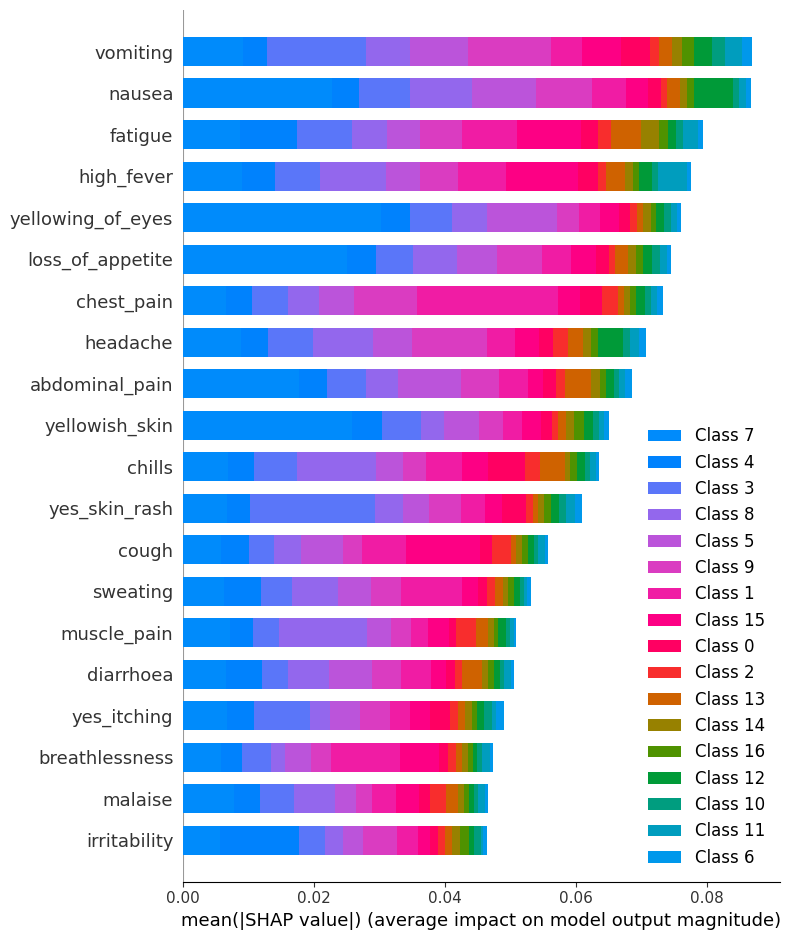

In [ ]:
print("KNeighborsClassifier: Variable Importance Plot - Global Interpretation")

shap.summary_plot(shap_values_knn, x_test)

In [ ]:
'''LIME'''


# Get the class names
class_names = np.unique(y_test)

# Get the feature names
feature_names = list(x_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(x_train.values, feature_names=feature_names, class_names=class_names, mode='classification')

# Choose an instance to explain (for example, the first instance in the test set)
instance_to_explain = x_test.iloc[0]

# Get the model's prediction for the chosen instance
model_prediction = knn.predict_proba(instance_to_explain.values.reshape(1, -1))[0]

# Use LimeTabularExplainer to explain the model's prediction for the chosen instance
explanation_knn = explainer.explain_instance(instance_to_explain.values, knn.predict_proba, num_features=len(feature_names))

# Print the explanation as a list
print(explanation_knn.as_list())

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


[('breathlessness <= 0.00', -0.3510946482104188), ('chest_pain <= 0.00', -0.33875454924387494), ('sweating <= 0.00', -0.2540148881869799), ('lack_of_concentration <= 0.00', -0.13737525006486517), ('dizziness <= 0.00', -0.13468938874763295), ('yes_itching <= 0.00', 0.09470327685011559), ('weakness_of_one_body_side <= 0.00', 0.09247829901630893), ('yes_skin_rash <= 0.00', 0.07887920123229217), ('nausea <= 0.00', 0.07741071915172762), ('burning_micturition <= 0.00', 0.07373266707986344), ('high_fever <= 0.00', 0.07134026360926707), ('yellowish_skin <= 0.00', 0.0676838510955357), ('loss_of_balance <= 0.00', -0.06616836682655657), ('dischromic _patches <= 0.00', 0.06327993006518191), ('nodal_skin_eruptions <= 0.00', 0.062721408528805), ('altered_sensorium <= 0.00', 0.061456116350503395), ('yellowing_of_eyes <= 0.00', 0.05944822638294533), ('chills <= 0.00', 0.05727343609949347), ('abdominal_pain <= 0.00', 0.05513766442257242), ('ulcers_on_tongue <= 0.00', 0.053674660676943), ('loss_of_appet

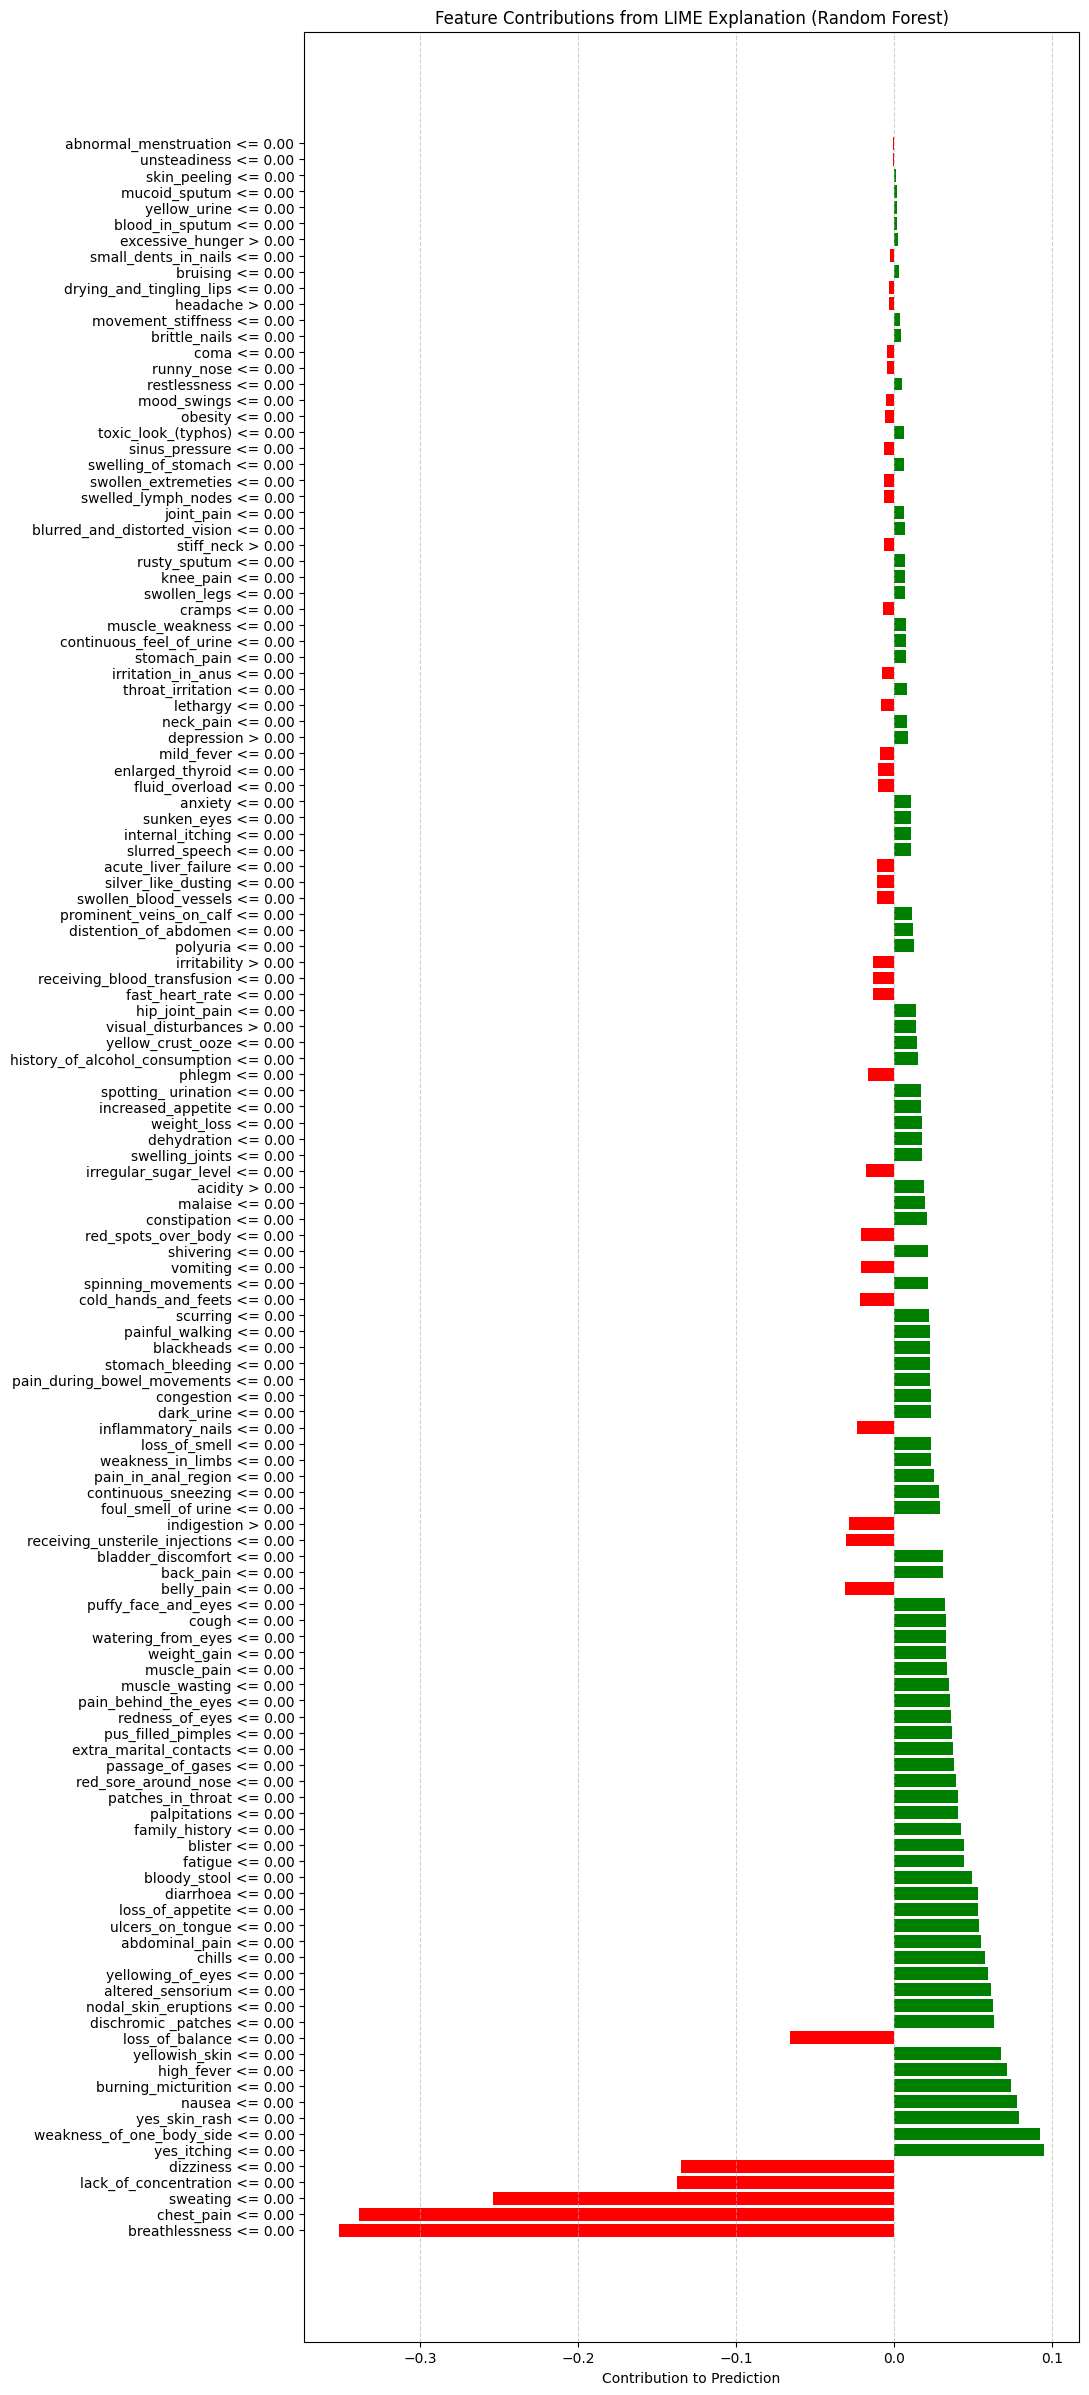

In [ ]:
# Extract feature names and contributions from the LIME explanation
features, contributions = zip(*explanation_knn.as_list())

# Plot the feature contributions
plt.figure(figsize=(10, 30))
plt.barh(features, contributions, color=['green' if c >= 0 else 'red' for c in contributions])
plt.xlabel('Contribution to Prediction')
plt.title('Feature Contributions from LIME Explanation (Random Forest)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.show()

#*Data visualization for KNN*

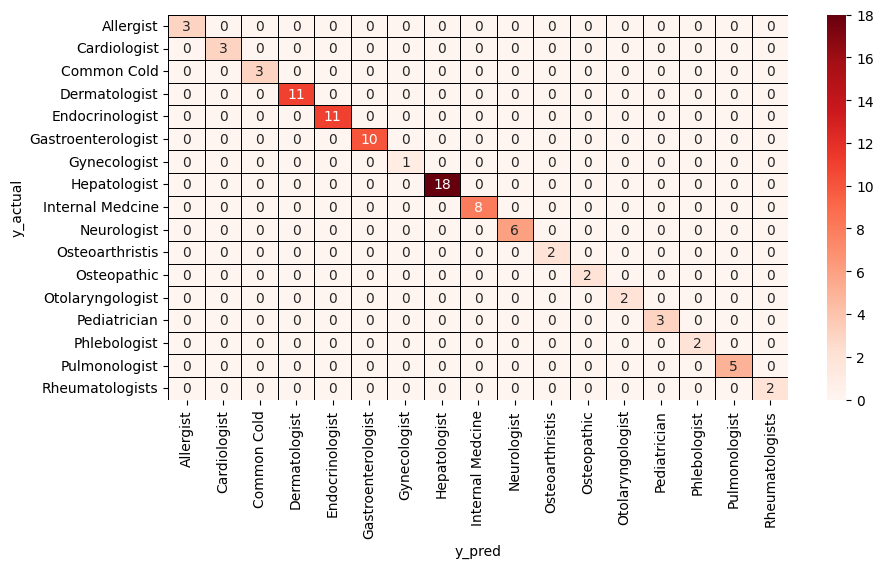

In [ ]:
#Confusion Matrix for KNN

y_pred1=knn.predict(x_test)
cm1= confusion_matrix(y_test, y_pred1)
import seaborn as sns
categories=np.unique(y_test)
f, ax =plt.subplots(figsize = (10,5))
sns.heatmap(cm1,annot = True, cmap="Reds", linewidths=0.5, linecolor="black", fmt=".0f", ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("y_pred")
plt.ylabel("y_actual")
plt.show()

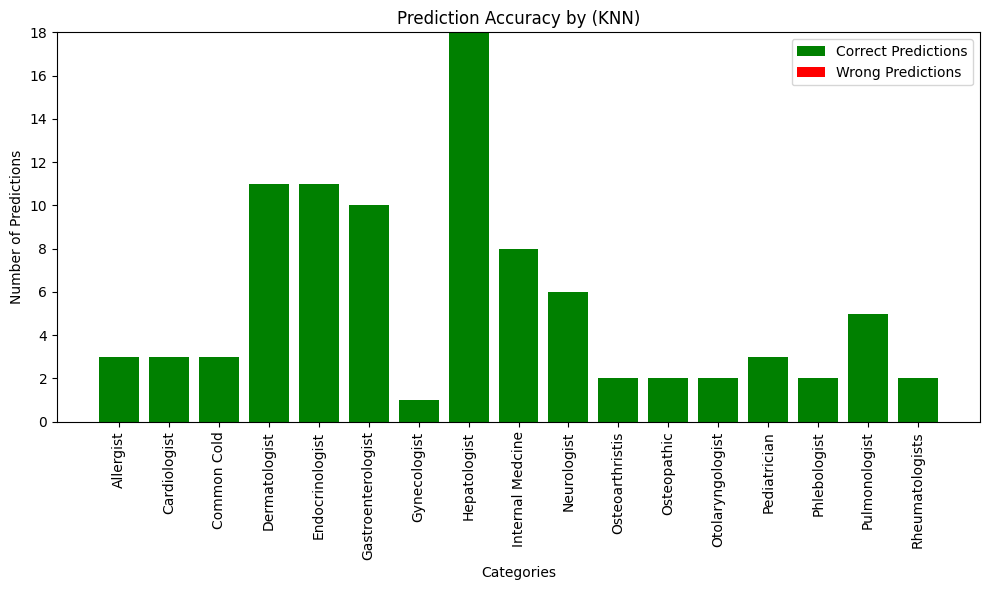

In [ ]:
# Create a grouped bar plot for KNN

correct_predictions = np.diagonal(cm1)
wrong_predictions = np.sum(cm1, axis=1) - correct_predictions

# Create a grouped bar plot with green and red colors
plt.figure(figsize=(10, 6))
p1 = plt.bar(categories, correct_predictions, color='green', label='Correct Predictions')
p2 = plt.bar(categories, wrong_predictions, bottom=correct_predictions, color='red', label='Wrong Predictions')

plt.xlabel('Categories')
plt.ylabel('Number of Predictions')
plt.title('Prediction Accuracy by (KNN)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

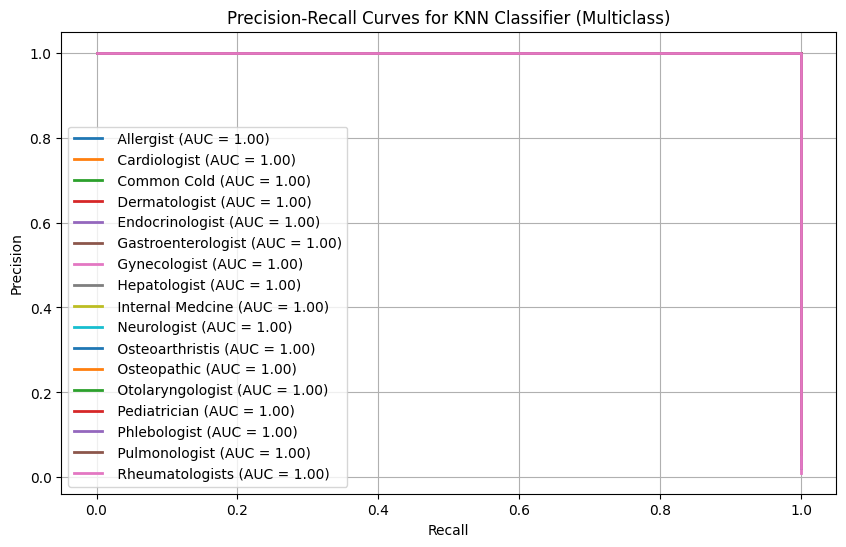

In [ ]:
#precision_recall curve for KNN

categories = np.unique(y_test)
plt.figure(figsize=(10, 6))
y_scores1 = knn.predict_proba(x_test)
# print(y_test)
for idx, category in enumerate(categories):
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test == category, y_scores1[:, idx])
    # Calculate area under the precision-recall curve (AUC-PR)

    pr_auc = auc(recall, precision)

    # Plot the precision-recall curve for the current class with AUC value labeled
    plt.plot(recall, precision, lw=2, label=f' {category} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for KNN Classifier (Multiclass)')
plt.legend()
plt.grid()
plt.show()

# *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
print("Accuracy score: {:.2f}".format(rf.score(x_test, y_test)))

Accuracy score: 1.00


#*XAI Methods*

Random Forest: Variable Importance Plot - Global Interpretation


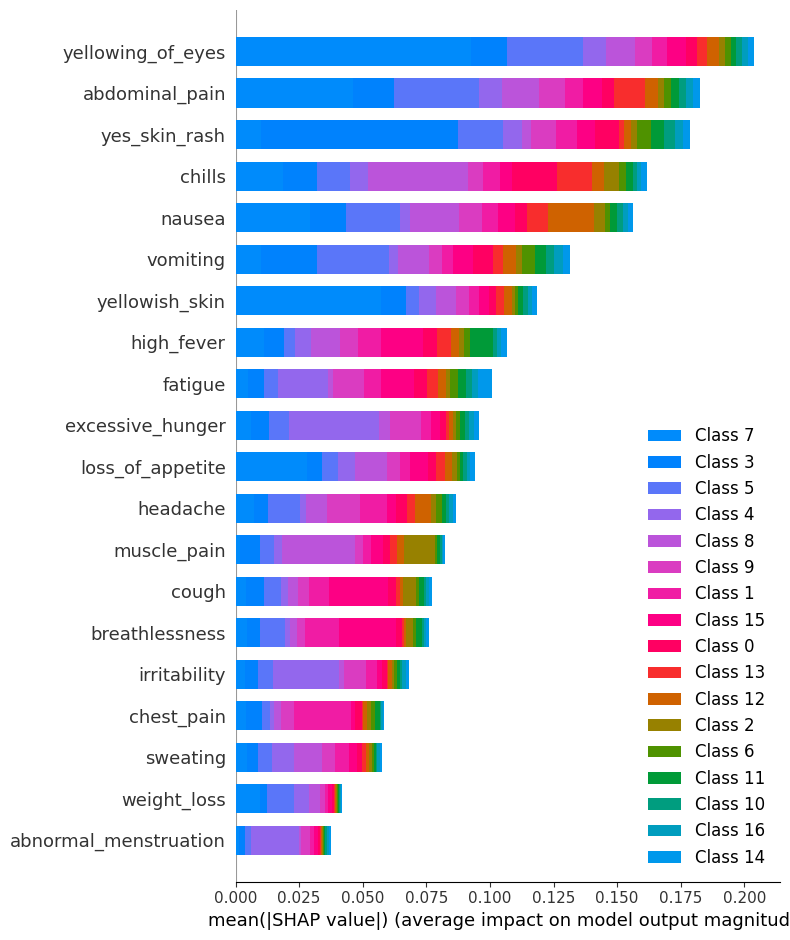

In [ ]:
'''SHAP'''
# Create the explainer
explainer = shap.TreeExplainer(rf)
shap_values_rf = explainer.shap_values(x_test)

print("Random Forest: Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values_rf, x_test)

In [ ]:
'''LIME'''
# Get the class names
class_names = np.unique(y_test)

# Get the feature names
feature_names = list(x_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(x_train.values, feature_names=feature_names, class_names=class_names, mode='classification')

# Choose an instance to explain (for example, the first instance in the test set)
instance_to_explain = x_test.iloc[0]

# Get the model's prediction for the chosen instance
model_prediction = rf.predict_proba(instance_to_explain.values.reshape(1, -1))[0]

# Use LimeTabularExplainer to explain the model's prediction for the chosen instance
explanation_rf = explainer.explain_instance(instance_to_explain.values, rf.predict_proba, num_features=len(feature_names))

# Print the explanation as a list
print(explanation_rf.as_list())


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


[('chest_pain <= 0.00', -0.10552052460395378), ('breathlessness <= 0.00', -0.0859692287842322), ('lack_of_concentration <= 0.00', -0.05263569966985177), ('sweating <= 0.00', -0.04742349128764079), ('loss_of_balance <= 0.00', -0.03492838962199413), ('abdominal_pain <= 0.00', 0.03421247158393204), ('yes_skin_rash <= 0.00', 0.03199594337392424), ('dizziness <= 0.00', -0.03113873490454701), ('chills <= 0.00', 0.03037572456842935), ('high_fever <= 0.00', 0.02966311612803909), ('yellowing_of_eyes <= 0.00', 0.02942471139317866), ('nausea <= 0.00', 0.028777967511274267), ('headache > 0.00', 0.026319548773529086), ('cough <= 0.00', 0.024606252462235866), ('yellowish_skin <= 0.00', 0.02254649011482921), ('excessive_hunger > 0.00', -0.020740227863603463), ('fatigue <= 0.00', 0.019975636807779616), ('loss_of_appetite <= 0.00', 0.019733235338741436), ('irritability > 0.00', -0.019106948228953067), ('back_pain <= 0.00', 0.017946742441161862), ('muscle_pain <= 0.00', 0.015968779277852303), ('abnormal

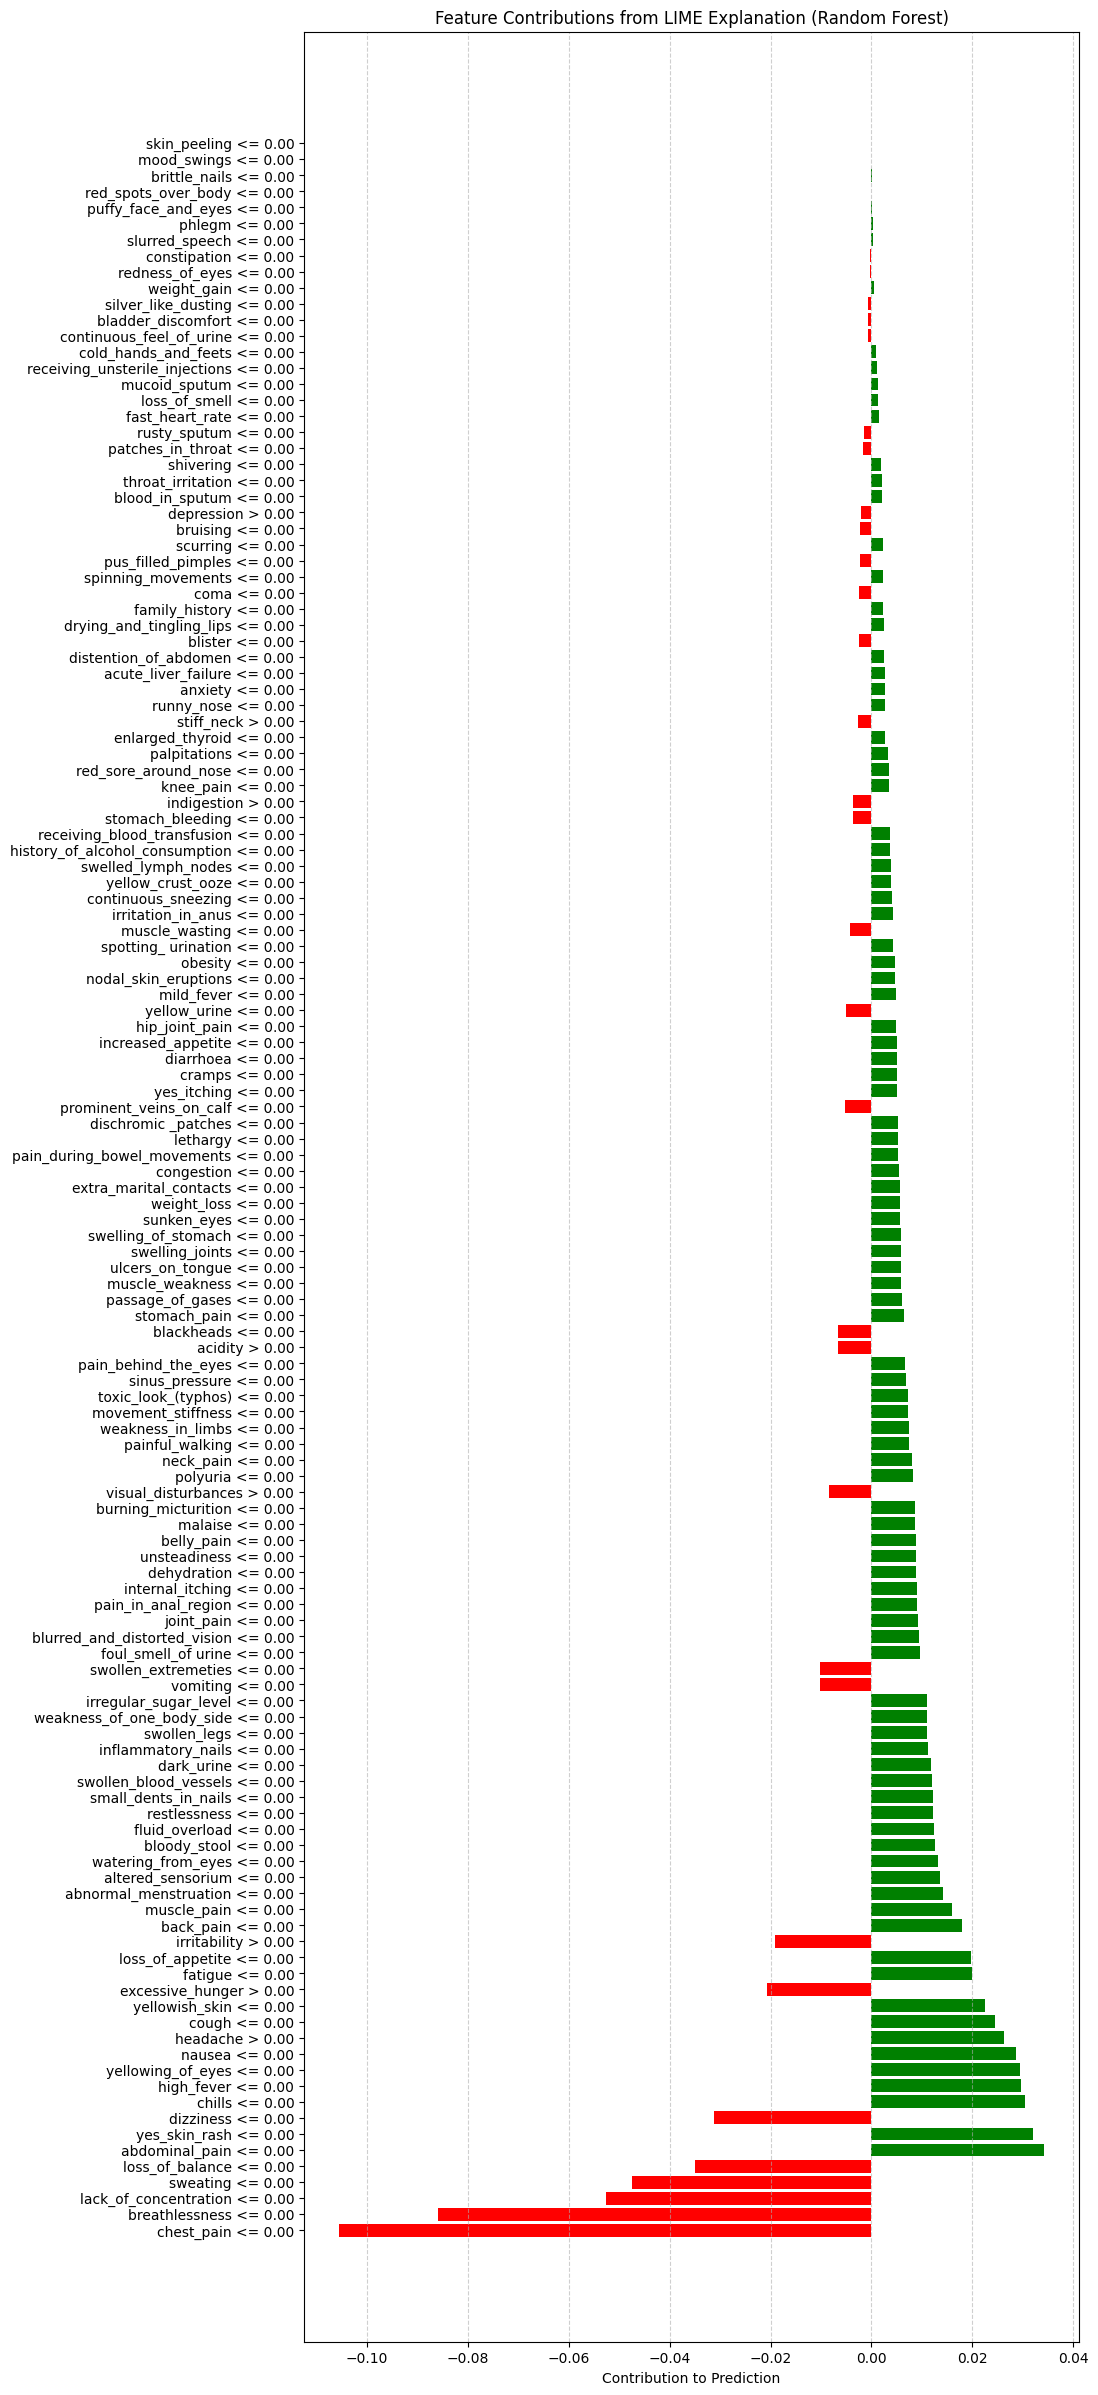

In [ ]:
# Extract feature names and contributions from the LIME explanation
features, contributions = zip(*explanation_rf.as_list())

# Plot the feature contributions
plt.figure(figsize=(10, 30))
plt.barh(features, contributions, color=['green' if c >= 0 else 'red' for c in contributions])
plt.xlabel('Contribution to Prediction')
plt.title('Feature Contributions from LIME Explanation (Random Forest)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.show()


#*Data visualization for Random Forest*

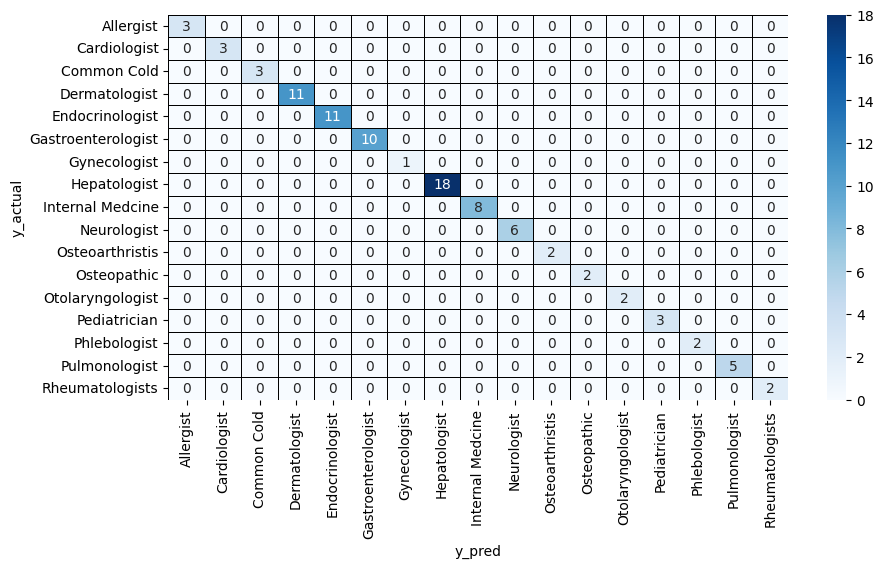

In [ ]:
#Confusion Matrix for Random Forest

y_pred3=rf.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
import seaborn as sns
categories=np.unique(y_test)
f, ax =plt.subplots(figsize = (10,5))
sns.heatmap(cm3,annot = True, cmap="Blues", linewidths=0.5, linecolor="black", fmt=".0f", ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("y_pred")
plt.ylabel("y_actual")
plt.show()

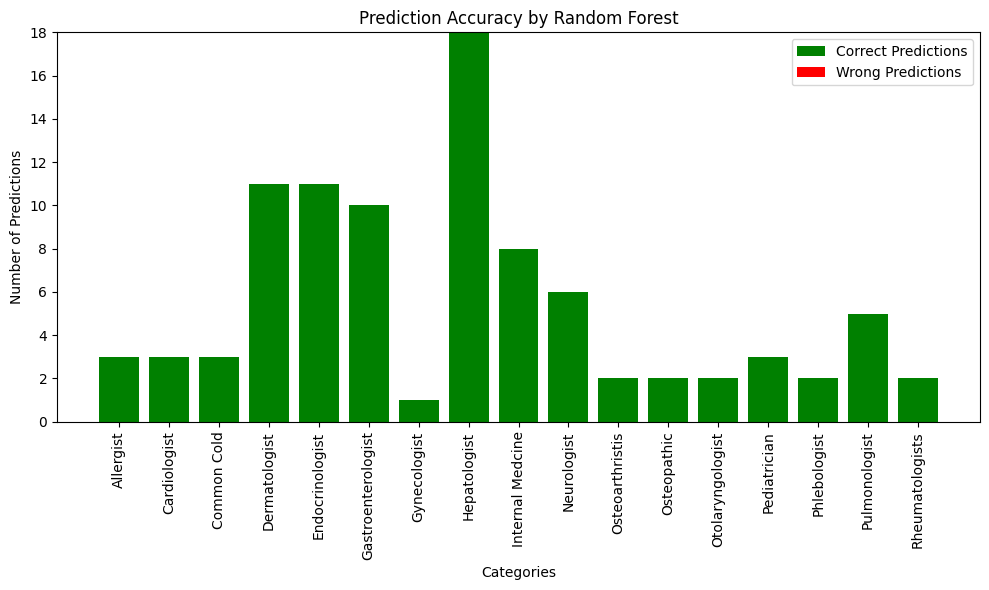

In [ ]:
# Create a grouped bar plot for Random Forest

correct_predictions = np.diagonal(cm3)
wrong_predictions = np.sum(cm3, axis=1) - correct_predictions

plt.figure(figsize=(10, 6))
p1 = plt.bar(categories, correct_predictions, color='green')
p2 = plt.bar(categories, wrong_predictions, bottom=correct_predictions, color='red')

plt.xlabel('Categories')
plt.ylabel('Number of Predictions')
plt.title('Prediction Accuracy by Random Forest')
plt.legend((p1[0], p2[0]), ('Correct Predictions', 'Wrong Predictions'))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

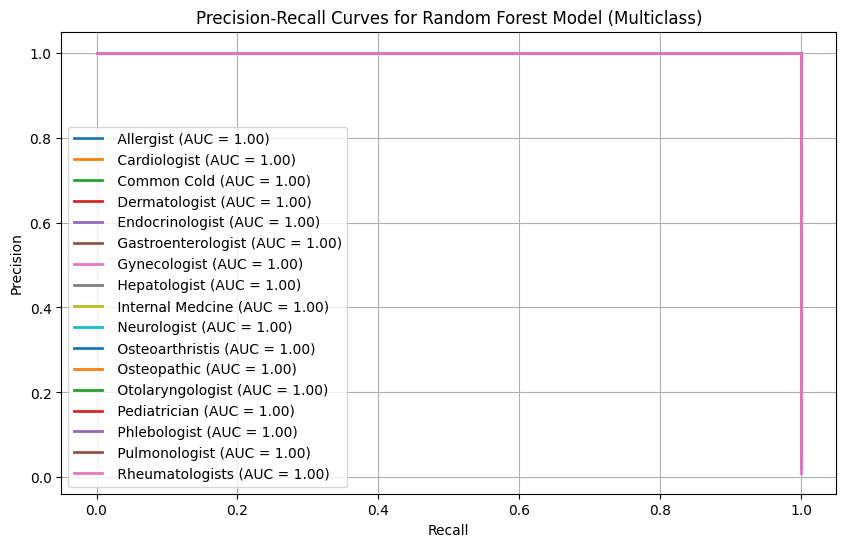

In [ ]:
#precision_recall curve for Random Forest

categories = np.unique(y_test)
plt.figure(figsize=(10, 6))
y_scores = rf.predict_proba(x_test)
for idx, category in enumerate(categories):
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test == category, y_scores[:, idx])
    # Calculate area under the precision-recall curve (AUC-PR)
    pr_auc = auc(recall, precision)

    # Plot the precision-recall curve for the current class with AUC value labeled
    plt.plot(recall, precision, lw=2, label=f' {category} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Random Forest Model (Multiclass)')
plt.legend()
plt.grid()
plt.show()

#*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print("Accuracy score: {:.2f}".format(lr.score(x_test, y_test)))

Accuracy score: 1.00


#*XAI Methods*

LogisticRegression: Variable Importance Plot - Global Interpretation


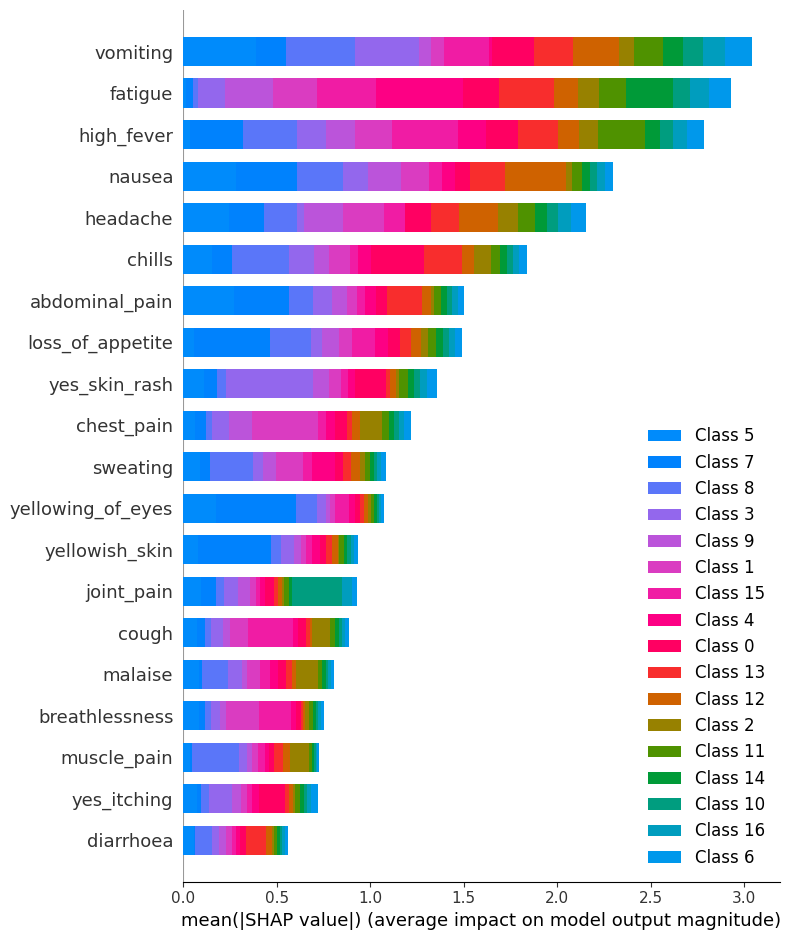

In [ ]:
'''SHAP'''
# Create the explainer
explainer = shap.LinearExplainer(lr, x_train)
shap_values_lr = explainer.shap_values(x_test)

# Plot the SHAP values
print("LogisticRegression: Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values_lr, x_test)

In [ ]:
'''LIME'''
# Get the class names
class_names = np.unique(y_test)

# Get the feature names
feature_names = list(x_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(x_train.values, feature_names=feature_names, class_names=class_names, mode='classification')

# Choose an instance to explain (for example, the first instance in the test set)
instance_to_explain = x_test.iloc[0]

# Get the model's prediction for the chosen instance
model_prediction = lr.predict_proba(instance_to_explain.values.reshape(1, -1))[0]

# Use LimeTabularExplainer to explain the model's prediction for the chosen instance
explanation_lr = explainer.explain_instance(instance_to_explain.values, lr.predict_proba, num_features=len(feature_names))

# Print the explanation as a list
print(explanation_lr.as_list())

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


[('chest_pain <= 0.00', -0.08976979882145071), ('breathlessness <= 0.00', -0.08738186805347278), ('lack_of_concentration <= 0.00', -0.07798892721059059), ('dizziness <= 0.00', -0.04916539647916196), ('headache > 0.00', 0.03892166219970633), ('loss_of_balance <= 0.00', -0.03783088409871952), ('sweating <= 0.00', -0.03372083246353877), ('fatigue <= 0.00', 0.02275748761121629), ('high_fever <= 0.00', 0.022324358868591795), ('cough <= 0.00', 0.02170652139596109), ('nausea <= 0.00', 0.02117819425687981), ('yes_skin_rash <= 0.00', 0.017754808020477995), ('loss_of_appetite <= 0.00', 0.01767534008697191), ('abdominal_pain <= 0.00', 0.017149550350672615), ('yes_itching <= 0.00', 0.015997807538441315), ('chills <= 0.00', 0.015438276819506332), ('yellowish_skin <= 0.00', 0.015255683275814157), ('weakness_of_one_body_side <= 0.00', 0.015038606839987315), ('irritation_in_anus <= 0.00', 0.013220714125951242), ('back_pain <= 0.00', 0.013103313986567857), ('yellowing_of_eyes <= 0.00', 0.01244668591643

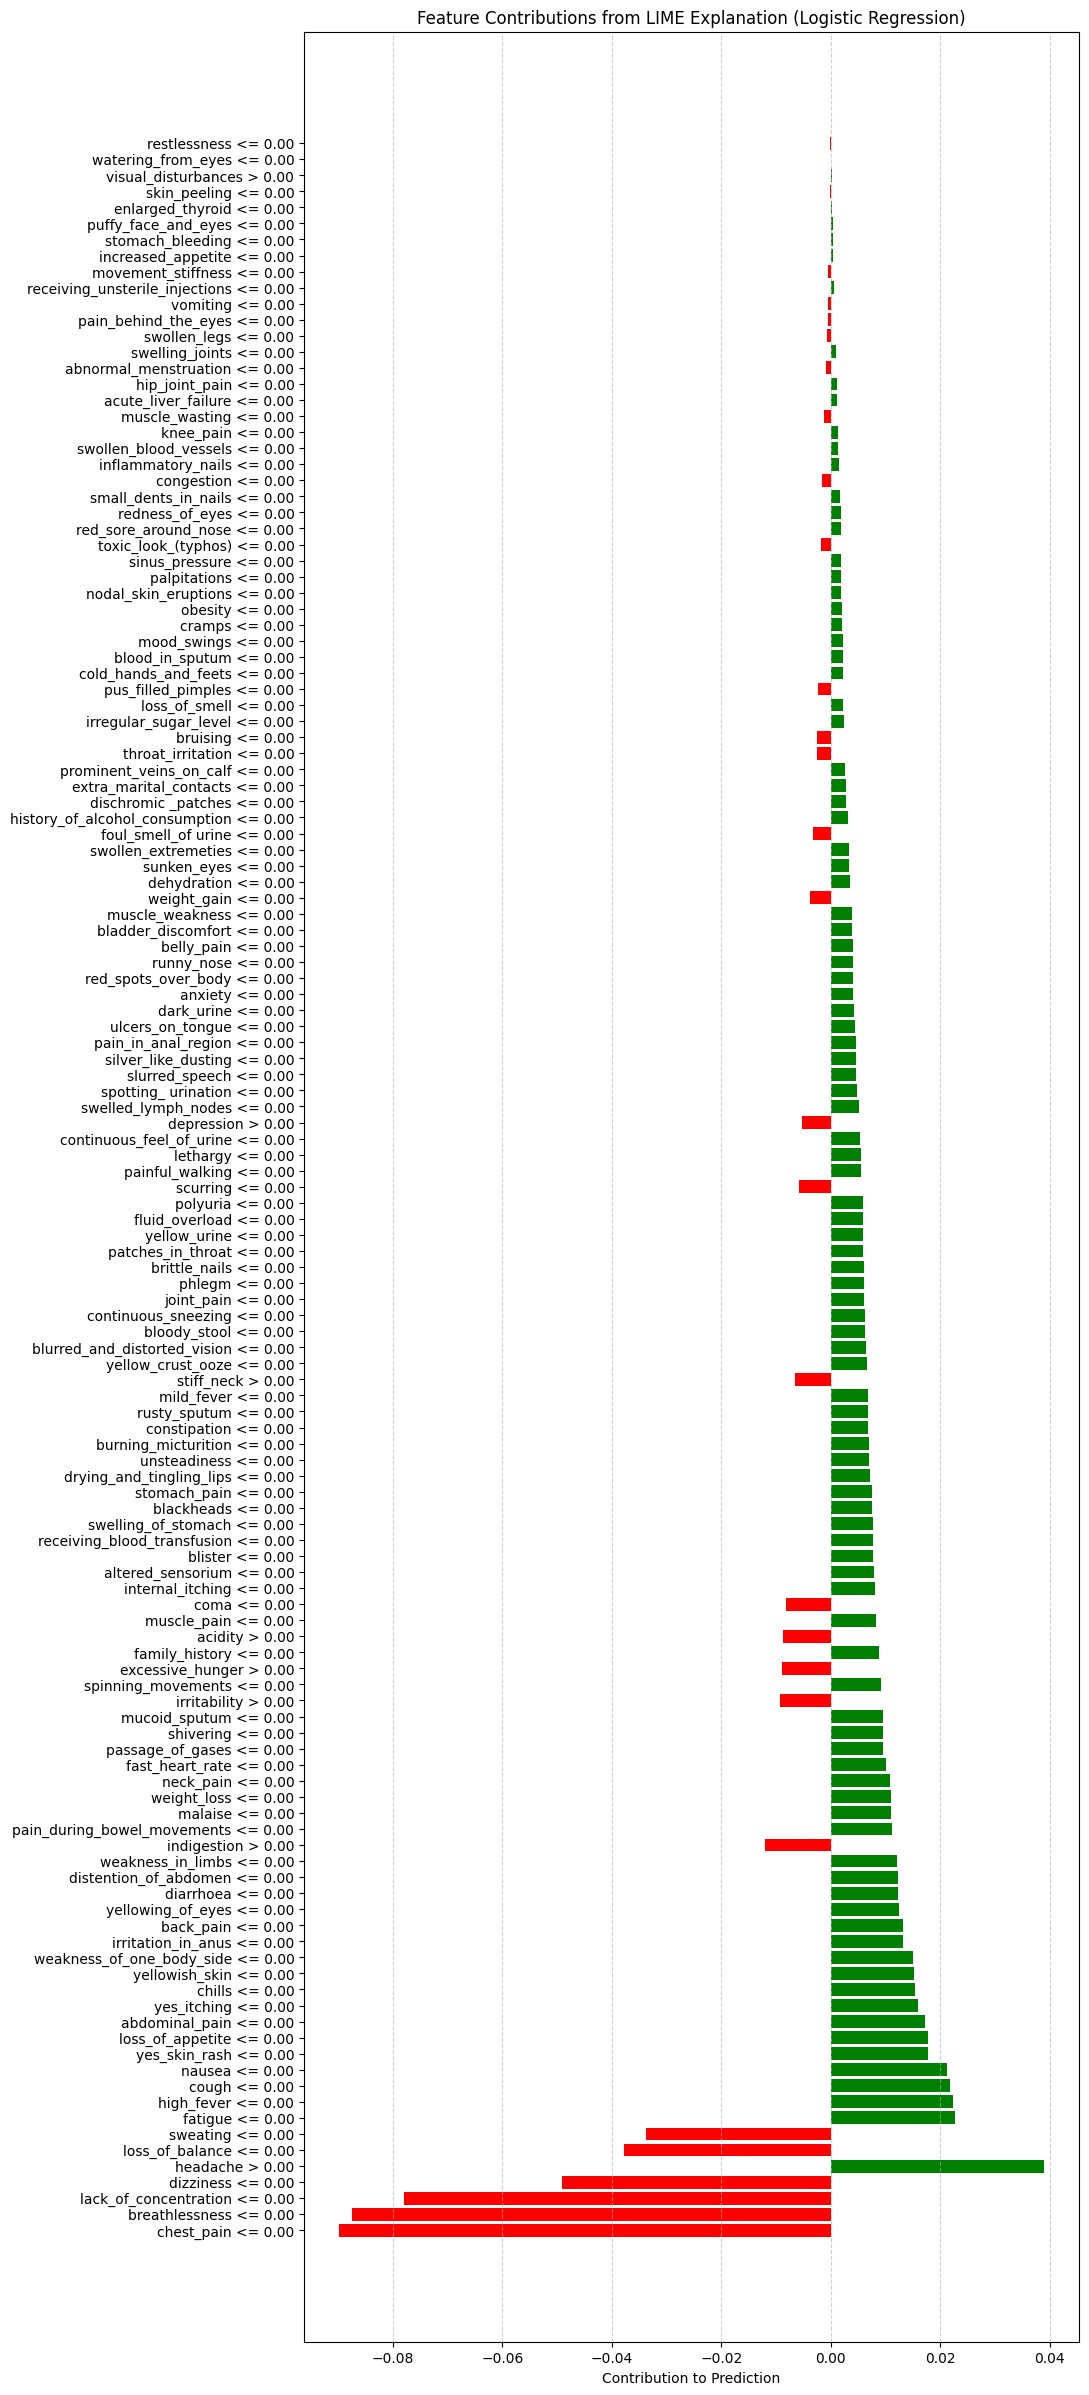

In [ ]:
# Extract feature names and contributions from the LIME explanation
features, contributions = zip(*explanation_lr.as_list())

# Plot the feature contributions
plt.figure(figsize=(10, 30))
plt.barh(features, contributions, color=['green' if c >= 0 else 'red' for c in contributions])
plt.xlabel('Contribution to Prediction')
plt.title('Feature Contributions from LIME Explanation (Logistic Regression)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.show()

#*Data visualization for Logistic Regression*

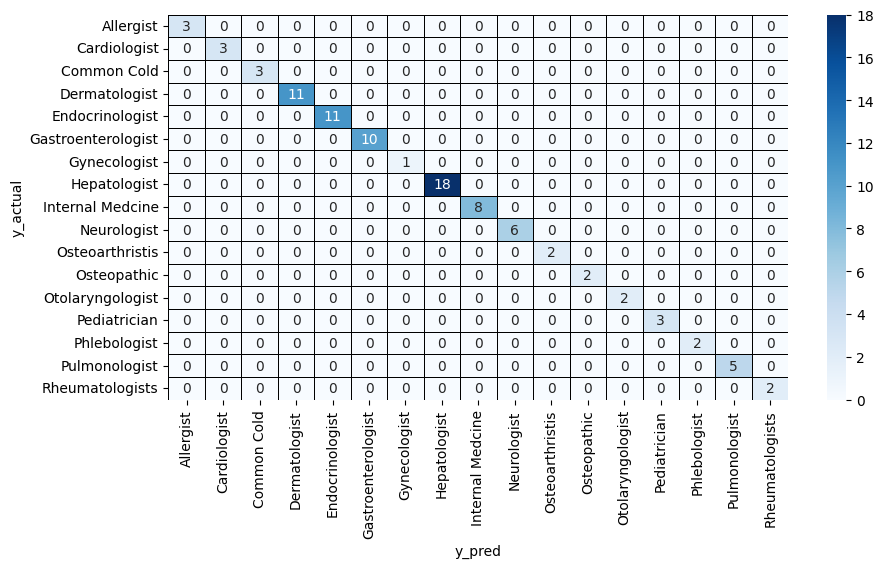

In [ ]:
#Confusion Matrix for Logistic Regression

y_pred3=lr.predict(x_test)
cm4 = confusion_matrix(y_test, y_pred3)
import seaborn as sns
categories=np.unique(y_test)
f, ax =plt.subplots(figsize = (10,5))
sns.heatmap(cm4,annot = True, cmap="Blues", linewidths=0.5, linecolor="black", fmt=".0f", ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("y_pred")
plt.ylabel("y_actual")
plt.show()

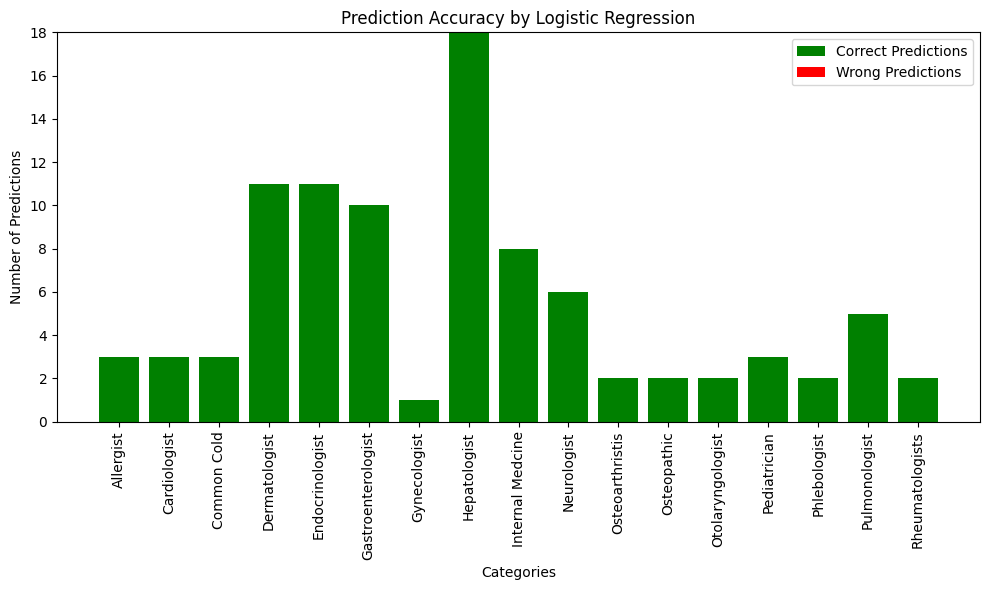

In [ ]:
# Create a grouped bar plot for Logistic Regression

correct_predictions = np.diagonal(cm3)
wrong_predictions = np.sum(cm4, axis=1) - correct_predictions

plt.figure(figsize=(10, 6))
p1 = plt.bar(categories, correct_predictions, color='green')
p2 = plt.bar(categories, wrong_predictions, bottom=correct_predictions, color='red')

plt.xlabel('Categories')
plt.ylabel('Number of Predictions')
plt.title('Prediction Accuracy by Logistic Regression')
plt.legend((p1[0], p2[0]), ('Correct Predictions', 'Wrong Predictions'))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

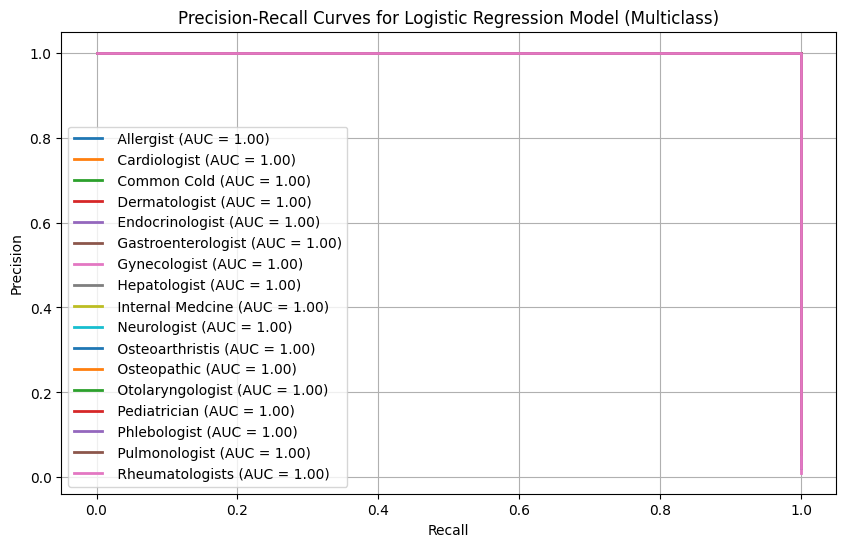

In [ ]:
#precision_recall curve for Logistic Regression

categories = np.unique(y_test)
plt.figure(figsize=(10, 6))
y_scores = lr.predict_proba(x_test)
for idx, category in enumerate(categories):
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test == category, y_scores[:, idx])
    # Calculate area under the precision-recall curve (AUC-PR)
    pr_auc = auc(recall, precision)

    # Plot the precision-recall curve for the current class with AUC value labeled
    plt.plot(recall, precision, lw=2, label=f' {category} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Logistic Regression Model (Multiclass)')
plt.legend()
plt.grid()
plt.show()

#*Comparison Analysis between models*

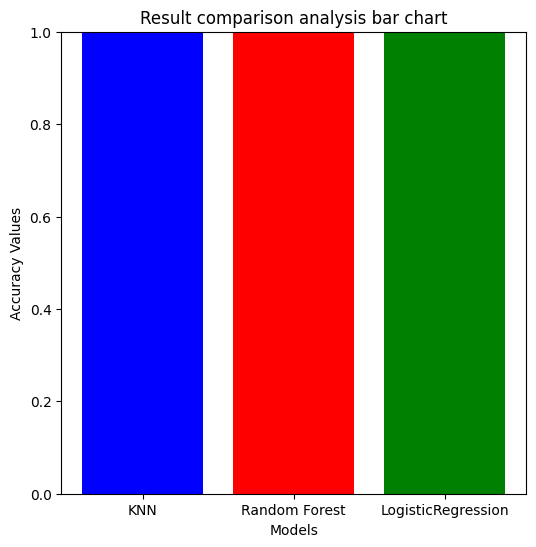

In [ ]:
labels = ["KNN","Random Forest", "LogisticRegression"]
x1_score=knn.score(x_test,y_test)
x2_score=rf.score(x_test,y_test)
x3_score=lr.score(x_test,y_test)
values = [x1_score,x2_score,x3_score]
plt.figure(figsize=(6, 6))
# Create a bar chart
plt.bar(labels, values, color=['blue', 'red', 'green'])

# Set chart title and labels
plt.title('Result comparison analysis bar chart')
plt.xlabel('Models')
plt.ylabel('Accuracy Values')

# Set y-axis range to 0 to 1
plt.ylim(0, 1)
# Display the chart
plt.show()